# PCA Visualization

PCA Algorithm in simple terms :- It looks at our data and chooses 1 or more axes to represent a data by taking the original data and projecting it onto the new axes , this gives a smaller set of axes which retains most of the spread / variation / information  of original dataset so that we can plot the projected data in 2-D plane and can visualise.




## **Synthetic Data**

**Data with Full covariance** :- means that we are considering the relationships between all pairs of variables. Each element of the covariance matrix tells us how two specific variables are related. It provides a complete picture of how all the variables in a dataset vary together.





**Data with Tied Covariance** :- Tied covariance simplifies things by assuming that all variables have the same level of covariance with each other. In other words, it assumes that the relationships between all pairs of variables are the same. This can be useful when dealing with high-dimensional data where estimating the full covariance matrix is challenging



**Data with Diagonal Covariancs** :- assumes that variables are only related to themselves (they have a covariance of 1 with themselves), and they are not related to any other variables (covariance with other variables is 0). It's like saying that each variable behaves independently of the others.

**Data with Spherical Covariances**:-A special case where all variables have the same variance (a measure of how much a variable varies on its own) and no covariance with each other. It's like assuming that all variables have a circular relationship, not an elliptical or stretched one.


### Visualising Different Covariances Structures

In [126]:
#Visualising diffferent kind of Synthetic Data :-

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# Generating random 2-D data points
np.random.seed(5)
n_samples = 100
mean = [0, 0]
cov_full = [[1, 0.8], [0.8, 1]]
cov_tied = [[1, 0.5], [0.5, 1]]
cov_diagonal = [[1, 0], [0, 3]]
cov_spherical = [[2, 0], [0, 2]]

data_full = np.random.multivariate_normal(mean, cov_full, n_samples)
data_tied = np.random.multivariate_normal(mean, cov_tied, n_samples)
data_diagonal = np.random.multivariate_normal(mean, cov_diagonal, n_samples)
data_spherical = np.random.multivariate_normal(mean, cov_spherical, n_samples)



In [129]:
def plot_cov_ellipse(ax, data, color, label):
    covariance_matrix = np.cov(data, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Sort eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]



    major_axis = 2 * np.sqrt(2.0) * np.sqrt(eigenvalues[1])
    minor_axis = 2 * np.sqrt(2.0) * np.sqrt(eigenvalues[0])


    angle = np.degrees(np.arctan2(*eigenvectors[:, 1]))  # Use the first eigenvector

    if label == 'Diagonal Covariance':
      angle = 0

    ellipse = Ellipse(mean, major_axis, minor_axis, angle, color=color, alpha=0.5, label=label)
    ax.add_patch(ellipse)

    print(eigenvalues)
    print(eigenvectors)
    print()



<ipython-input-129-477e09fba320>:21: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ellipse = Ellipse(mean, major_axis, minor_axis, angle, color=color, alpha=0.5, label=label)


[0.16052776 2.02943282]
[[ 0.67821573 -0.73486286]
 [-0.73486286 -0.67821573]]

[0.45956304 1.53564234]
[[-0.78259529  0.62253082]
 [ 0.62253082  0.78259529]]

[1.09732814 2.32707705]
[[-0.99767868 -0.06809736]
 [-0.06809736  0.99767868]]

[1.87910902 2.05183024]
[[-0.99452379 -0.10451041]
 [-0.10451041  0.99452379]]



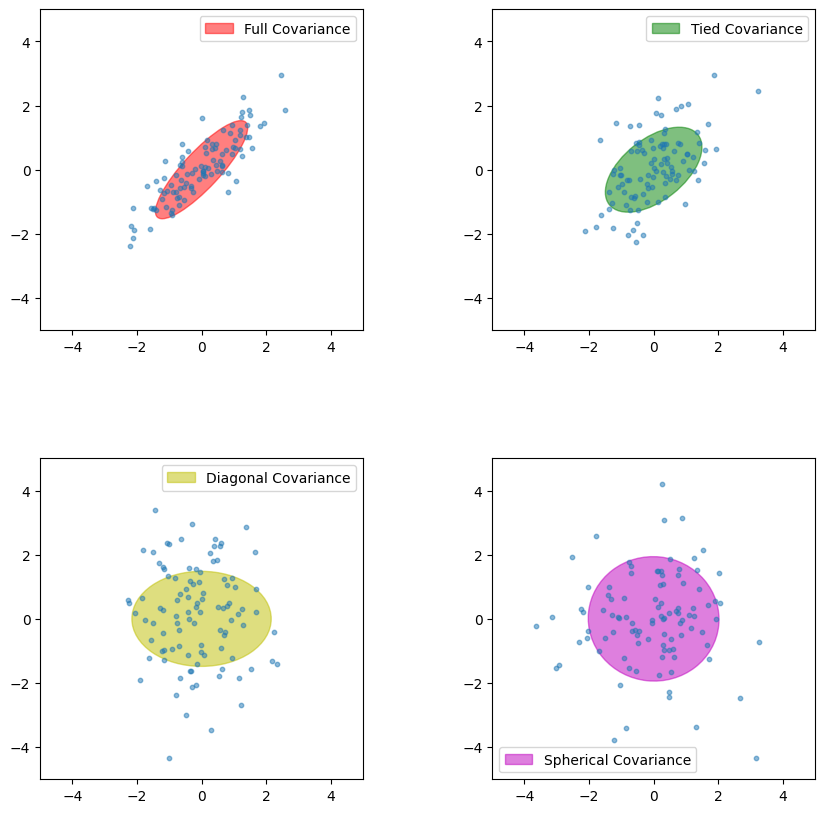

In [130]:

# Creating subplots to visualize covariances
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
axes = axes.ravel()

plot_cov_ellipse(axes[0], data_full, 'r', 'Full Covariance')
axes[0].legend()

plot_cov_ellipse(axes[1], data_tied, 'g', 'Tied Covariance')
axes[1].legend()

plot_cov_ellipse(axes[2], data_diagonal, 'y', 'Diagonal Covariance')
axes[2].legend()

plot_cov_ellipse(axes[3], data_spherical, 'm', 'Spherical Covariance')
axes[3].legend()

data_list = [ data_full ,data_tied , data_diagonal, data_spherical ]

for ax , data  in zip(axes , data_list):
    ax.scatter(data[:, 0], data[:, 1], s=10, alpha=0.5)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)

axes[0].legend()

plt.show()


### Other Graphs to Visualize

In [80]:
np.random.seed(5)
n_samples = 50
mean = [0, 0]
cov_full = [[1, 1.4], [1.4, 1.3]]
cov_tied = [[2,0.8], [0.8, 2]]
cov_diagonal = [[1, 0], [0, 3]]
cov_spherical = [[1, 0], [0, 1]]

data_full = np.random.multivariate_normal(mean, cov_full, n_samples)
data_tied = np.random.multivariate_normal(mean, cov_tied, n_samples)
data_diagonal = np.random.multivariate_normal(mean, cov_diagonal, n_samples)
data_spherical = np.random.multivariate_normal(mean, cov_spherical, n_samples)

<ipython-input-80-d7ff53aadfde>:9: RuntimeWarning: covariance is not positive-semidefinite.
  data_full = np.random.multivariate_normal(mean, cov_full, n_samples)


<ipython-input-81-c5b962c1f765>:8: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ellipse = Ellipse(mean, major_axis, minor_axis, angle, fill=False, color='red', linestyle='dashed', linewidth=2, label=label)


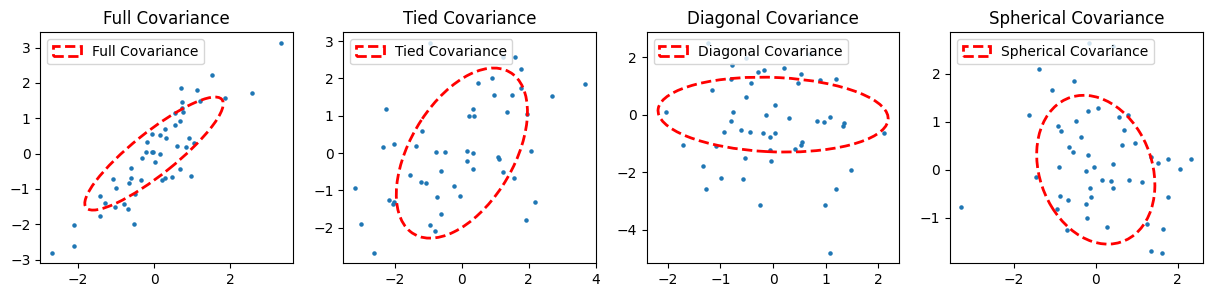

In [81]:
# Function to plot covariance ellipses
def plot_cov_ellipse(ax, data, label):
    covariance_matrix = np.cov(data, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    major_axis = 2 * np.sqrt(2.0) * np.sqrt(eigenvalues[1])
    minor_axis = 2 * np.sqrt(2.0) * np.sqrt(eigenvalues[0])
    angle = np.degrees(np.arctan2(*eigenvectors[:, 1]))
    ellipse = Ellipse(mean, major_axis, minor_axis, angle, fill=False, color='red', linestyle='dashed', linewidth=2, label=label)
    ax.add_patch(ellipse)

# plotting subplots to visualize the synthetic data with covariance ellipses
plt.figure(figsize=(15, 3))
plt.subplot(141)
plt.scatter(data_full[:, 0], data_full[:, 1] , s = 5)
plot_cov_ellipse(plt.gca(), data_full, "Full Covariance")
plt.title("Full Covariance")
plt.legend(loc="upper left")

plt.subplot(142)
plt.scatter(data_tied[:, 0], data_tied[:, 1]   , s = 5)
plot_cov_ellipse(plt.gca(), data_tied, "Tied Covariance")
plt.title("Tied Covariance")
plt.legend(loc="upper left")


plt.subplot(143)
plt.scatter(data_diagonal[:, 0], data_diagonal[:, 1]  , s = 5)
plot_cov_ellipse(plt.gca(), data_diagonal, "Diagonal Covariance")
plt.title("Diagonal Covariance")
plt.legend(loc="upper left")


plt.subplot(144)
plt.scatter(data_spherical[:, 0], data_spherical[:, 1]  , s = 5)
plot_cov_ellipse(plt.gca(), data_spherical, "Spherical Covariance")
plt.title("Spherical Covariance")

plt.legend(loc="upper left")
plt.show()


### Implementing PCA




In [82]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

In [83]:
# Generate synthetic 2D data with points in the first and third quadrants
np.random.seed(0)
n_samples =  20

# Generate 3-4 points in the first quadrant
mean1 = [1, 1]
cov1 = [[0.1, 0], [0, 0.1]]
data1 = np.random.multivariate_normal(mean1, cov1, n_samples // 2)

# Generate 3-4 points in the third quadrant
mean2 = [-1, -1]
cov2 = [[0.1, 0], [0, 0.1]]
data2 = np.random.multivariate_normal(mean2, cov2, n_samples // 2)

X = np.vstack((data1, data2))

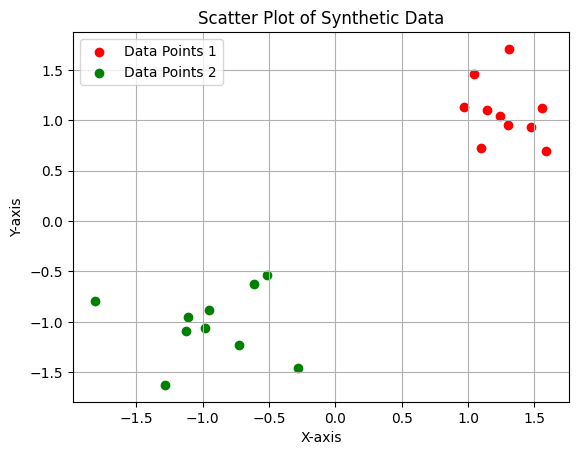

In [84]:
# scatter plot
plt.scatter(data1[:, 0], data1[:, 1], marker='o', color='r', label='Data Points 1')
plt.scatter(data2[:, 0], data2[:, 1], marker='o', color='g', label='Data Points 2')


# Set axis labels
plt.xlabel('X-axis'
)
plt.ylabel('Y-axis')

# Set plot title
plt.title('Scatter Plot of Synthetic Data')

# Display a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [85]:
!pip install ipywidgets

Shown below a line ( which u can think of as principal component )  and data points , by adjusting the slider / slope of line we can visualise the least square distances and the variance along the component.

In [86]:
# Create a scatter plot for the 2D data
def plot_data(angle=0):
    fig, ax = plt.subplots(figsize=(8, 8))

    # Scatter plot for data points
    ax.scatter(X[:, 0], X[:, 1], c='b', label='Data', edgecolor='k', s=50)

    # Compute the PCA line passing through the origin
    line_direction = np.array([np.cos(np.radians(angle)), np.sin(np.radians(angle))])
    line_end = line_direction * 2.5  # Extend the line for visualization
    line_end_1 = line_direction * (-2.5)
    # Plot the PCA Line
    ax.plot([0, line_end[0]], [0, line_end[1]], c='r', lw=2, label='PCA Line')
    ax.plot([0, line_end_1[0]], [0, line_end_1[1]], c='r', lw=2)

    line_slope = np.tan(np.radians(angle))


    # Plot perpendicular lines from each data point to the PCA line
    for x, y in X:
        # Calculate the coordinates of the intersection point
        intersection_x = (x + line_slope * y) / (1 + line_slope**2)
        intersection_y = line_slope * intersection_x

        # Plot the perpendicular line
        ax.plot([x, intersection_x], [y, intersection_y], '--', c='g', lw=1)

    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_title(f'PCA Line Rotation Angle: {angle} degrees')
    ax.legend()

    plt.grid(True)
    plt.show()

# Create a slider for rotation angle
angle_slider = widgets.FloatSlider(value=0.0, min=-180, max=180, step=1, description='Rotation Angle:')
display(angle_slider)

# Update the plot based on the slider value
widgets.interactive(plot_data, angle=angle_slider)

FloatSlider(value=0.0, description='Rotation Angle:', max=180.0, min=-180.0, step=1.0)

interactive(children=(FloatSlider(value=0.0, description='Rotation Angle:', max=180.0, min=-180.0, step=1.0), …

Performing PCA

In [87]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X)

In [88]:
explained_variance_ratio = pca.explained_variance_ratio_

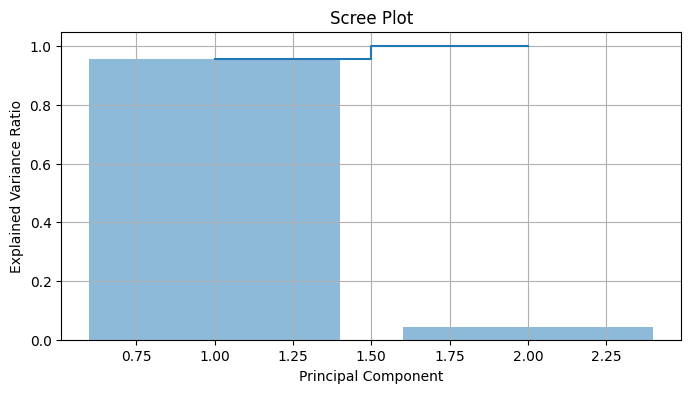

In [89]:
# Create a scree plot to visualize explained variance
plt.figure(figsize=(8, 4))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
plt.step(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), where='mid')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid()
plt.show()

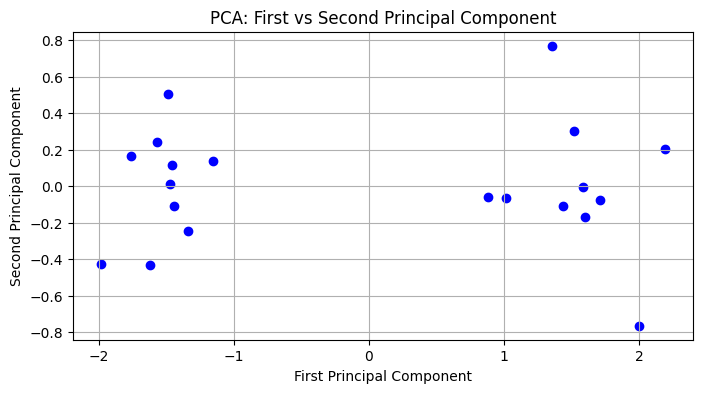

In [90]:
# Visualize the principal components
plt.figure(figsize=(8, 4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='b', marker='o')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA: First vs Second Principal Component')
plt.grid()
plt.show()

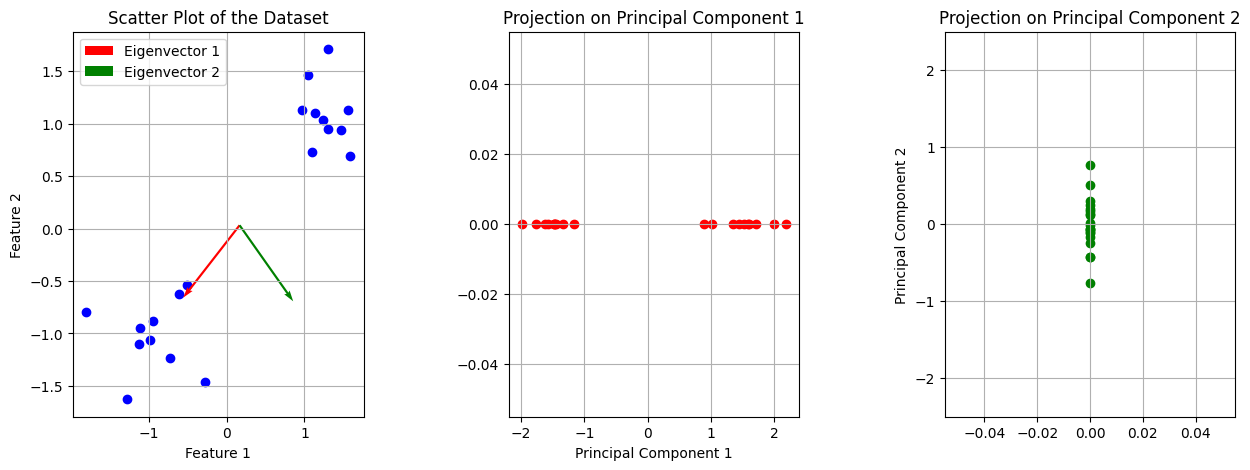

In [91]:

# Create a scatter plot of the dataset
plt.figure(figsize=(15, 5))


# Plot original data with eigen vectors
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c='b', marker='o')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of the Dataset')

# Add arrows representing the eigen vectors
eigen_vectors = pca.components_
origin = pca.mean_
plt.quiver(
    origin[0], origin[1],
    eigen_vectors[0, 0], eigen_vectors[0, 1],
    angles='xy', scale_units='xy', scale=1, color='r', label='Eigenvector 1'
)
plt.quiver(
    origin[0], origin[1],
    eigen_vectors[1, 0], eigen_vectors[1, 1],
    angles='xy', scale_units='xy', scale=1, color='g', label='Eigenvector 2'
)
plt.legend()

# Adjust the subplots
plt.subplots_adjust(wspace=0.5)
plt.grid()

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Plot the first principal component
plt.subplot(1, 3, 2)
plt.scatter(X_pca[:, 0], np.zeros_like(X_pca[:, 0]), c='r', marker='o')
plt.xlabel('Principal Component 1')
plt.title('Projection on Principal Component 1')
plt.grid()

# Plot the second principal component
plt.subplot(1, 3, 3)
plt.scatter(np.zeros_like(X_pca[:, 1]), X_pca[:, 1], c='g', marker='o')
plt.ylabel('Principal Component 2')
plt.ylim(-2.5, 2.5)  # Set the y-axis limits
plt.title('Projection on Principal Component 2')

plt.grid()
plt.show()


## Real World Dataset

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [94]:
# Load the pizza dataset

# link to dataset used: https://drive.google.com/file/d/17WaQwqIJ3J4qUaySn_9GKsdbkDzgiuty/view?usp=sharing

data = pd.read_csv("pizza.csv")

In [95]:
data.describe()

,id,mois,prot,fat,ash,sodium,carb,cal
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,20841.040000,40.903067,13.373567,20.229533,2.633233,0.669400,22.864767,3.271000
std,6962.917222,9.552987,6.434392,8.975658,1.269724,0.370358,18.029722,0.620034
min,14003.000000,25.000000,6.980000,4.380000,1.170000,0.250000,0.510000,2.180000
25%,14093.750000,30.902500,8.060000,14.770000,1.450000,0.450000,3.467500,2.910000
50%,24020.500000,43.300000,10.440000,17.135000,2.225000,0.490000,23.245000,3.215000
75%,24110.250000,49.115000,20.022500,21.435000,3.592500,0.702500,41.337500,3.520000
max,34045.000000,57.220000,28.480000,47.200000,5.430000,1.790000,48.640000,5.080000


In [96]:
# Extract the feature columns
X = data[['id', 'mois', 'prot' , 'fat' , 'ash' , 'sodium' , 'carb' , 'cal']].values

In [97]:
# Standardize the data (important for PCA)
mean = np.mean(X, axis=0)
std_dev = np.std(X, axis=0)
X_standardized = (X - mean) / std_dev

In [98]:
X_standardized.std()

1.0

In [99]:
# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_standardized)

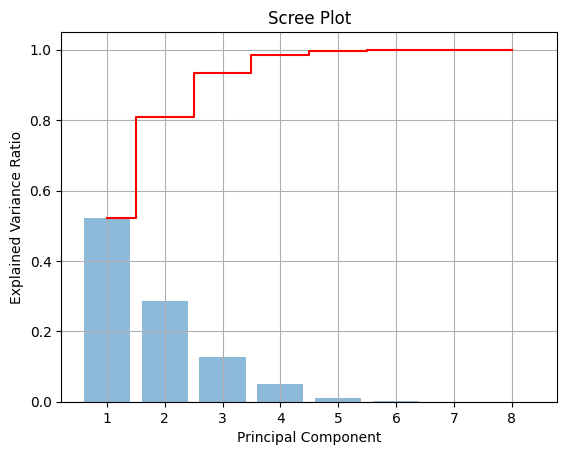

In [100]:
# Plot explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
plt.step(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), where='mid' , color = 'r')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid()
plt.show()

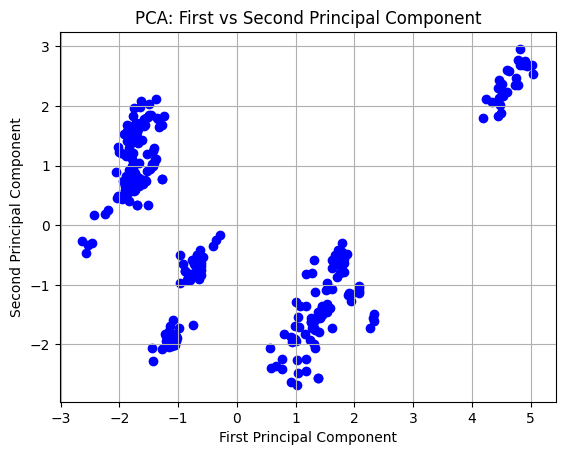

In [101]:
# Visualizing the first two principal components
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='b', marker='o')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA: First vs Second Principal Component')
plt.grid()
plt.show()

plt.show()


In [103]:
#To visualize the data in first 3 principal components  ( in 3D)
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display


# Create a function to update the 3D plot based on the angles
def update_plot(elev, azim):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c='b', marker='o')
    ax.set_xlabel('First Principal Component')
    ax.set_ylabel('Second Principal Component')
    ax.set_zlabel('Third Principal Component')
    ax.set_title('PCA: First vs Second vs Third Principal Component')
    ax.view_init(elev=elev, azim=azim)
    plt.grid()
    plt.show()

# Create sliders for elevation and azimuth angles
elevation_slider = widgets.FloatSlider(value=20, min=0, max=90, step=1, description='Elevation')
azimuth_slider = widgets.FloatSlider(value=30, min=0, max=360, step=1, description='Azimuth')

# Create an interactive widget
interactive_plot = widgets.interactive(update_plot, elev=elevation_slider, azim=azimuth_slider)
display(interactive_plot)

interactive(children=(FloatSlider(value=20.0, description='Elevation', max=90.0, step=1.0), FloatSlider(value=…

#**References**

PCA - [https://www.geeksforgeeks.org/principal-component-analysis-pca/](https://www.geeksforgeeks.org/principal-component-analysis-pca/)


Explained_variance_Ratio :- [https://www.geeksforgeeks.org/principal-component-analysis-pca/](https://www.geeksforgeeks.org/principal-component-analysis-pca/)

Differnet Covariances Structures :- [https://www.youtube.com/watch?v=u4GIs51YoTk](https://www.youtube.com/watch?v=u4GIs51YoTk)


Real World Dataset:- [https://data.world/sdhilip/pizza-datasets](https://data.world/sdhilip/pizza-datasets)